<a href="https://colab.research.google.com/github/abdelhadi-12/Machine-Learning-/blob/main/Diamond_Price_Prediction_R%C3%A9seau_de_Neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
  from google.colab import files
uploaded= files.upload()

Saving diamonds.csv to diamonds.csv


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
data = pd.read_csv("diamonds.csv")

# Nettoyage des données :
# - Suppression de la colonne inutile "Unnamed: 0".
# - Suppression des lignes avec des valeurs de dimensions 'x', 'y', ou 'z' égales à 0.
# - Application de filtres pour éliminer les valeurs aberrantes sur les dimensions et autres attributs comme 'depth' et 'table'.


In [9]:

data = data.drop(["Unnamed: 0"], axis=1)
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data = data[(data["depth"]<75) & (data["depth"]>45)]
data = data[(data["table"]<80) & (data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30) & (data["z"]>2)]

# Identifier les colonnes catégorielles ('object') dans les données.
# Copier les données originales pour les transformer.
# Utiliser un encodeur de labels (LabelEncoder) pour convertir les colonnes catégorielles en valeurs numériques.
# Cela permet de préparer les données pour les modèles qui nécessitent des entrées numériques.


In [10]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)
label_data = data.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

# Séparer les données en variables indépendantes (X) et variable cible (y).
# X contient toutes les colonnes sauf "price" (les caractéristiques), tandis que y contient uniquement la colonne "price" (la variable cible).


In [11]:
X = label_data.drop("price", axis=1)
y = label_data["price"]

# Appliquer une mise à l'échelle des données (standardisation) pour les variables indépendantes (X).
# Le StandardScaler ajuste les données pour avoir une moyenne de 0 et un écart-type de 1.
# Ensuite, diviser les données en ensembles d'entraînement et de test (80% / 20%) pour l'évaluation du modèle.


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Définition d'un modèle de réseau de neurones séquentiel pour la régression :
# - 2 couches denses avec des activations ReLU et dropout pour éviter le surapprentissage.
# - 1 couche de sortie avec une activation linéaire pour prédire un prix.
# - Compilation du modèle avec l'optimiseur Adam et une fonction de perte MSE, en utilisant MAE comme métrique.


In [13]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))  # Prédiction de prix

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Entraînement du modèle sur les données d'entraînement (X_train, y_train).
# - Le modèle est entraîné pendant 100 époques avec une taille de batch de 32.
# - 20% des données d'entraînement sont utilisées pour la validation à chaque époque.
# - 'verbose=0' permet d'entrainer le modèle sans afficher de détails pendant l'entraînement.


In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


# Faire des prédictions sur les données de test (X_test) avec le modèle entraîné.
# - 'flatten()' est utilisé pour transformer les prédictions en un vecteur 1D.
# Calculer l'erreur quadratique moyenne (MSE) et le coefficient de détermination (R²) pour évaluer la performance du modèle.
# Afficher les résultats de l'évaluation du modèle (MSE et R²).


In [15]:
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Réseau de Neurones (MLP) ---")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Réseau de Neurones (MLP) ---
Mean Squared Error: 1129637.12
R² Score: 0.93


# Effectue des prédictions sur les données de test et évalue les performances du modèle à l'aide de MSE et R².
# Affiche les résultats de l'évaluation (MSE et R²) pour mesurer la précision du modèle.


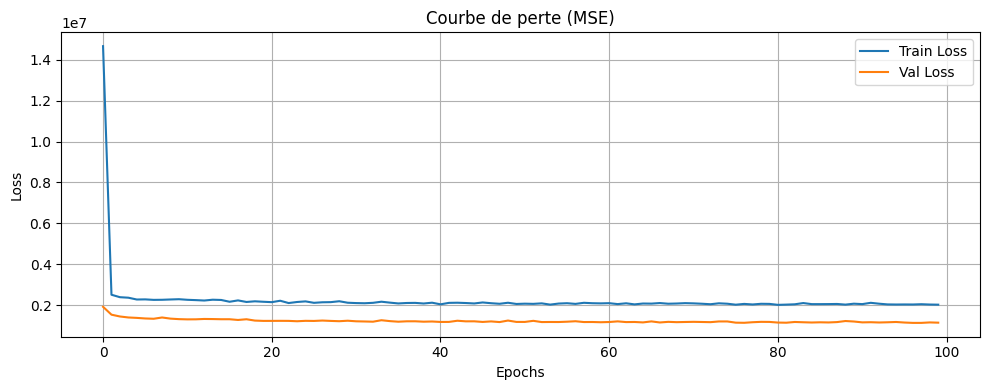

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Courbe de perte (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor# 4. Modèle MLP ---------------------------------------------------------------
mlp = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="linear")
])
mlp.compile(optimizer=Adam(1e-3), loss="mse", metrics=["mae"])
history = mlp.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ajouter modéles

In [20]:
# 5. Autres modèles
rf  = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, objective="reg:squarederror")
models = [("MLP", mlp), ("Random Forest", rf), ("XGBoost", xgb)]
results = {}
for name, model in models:
    if name != "MLP":
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test).flatten()
    results[name] = (mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))


337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


diamonds price comparison

<ipython-input-21-f1b431782feb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_vals, ax=axes[0], palette="Blues_d")
<ipython-input-21-f1b431782feb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_vals, ax=axes[1], palette="Greens_d")


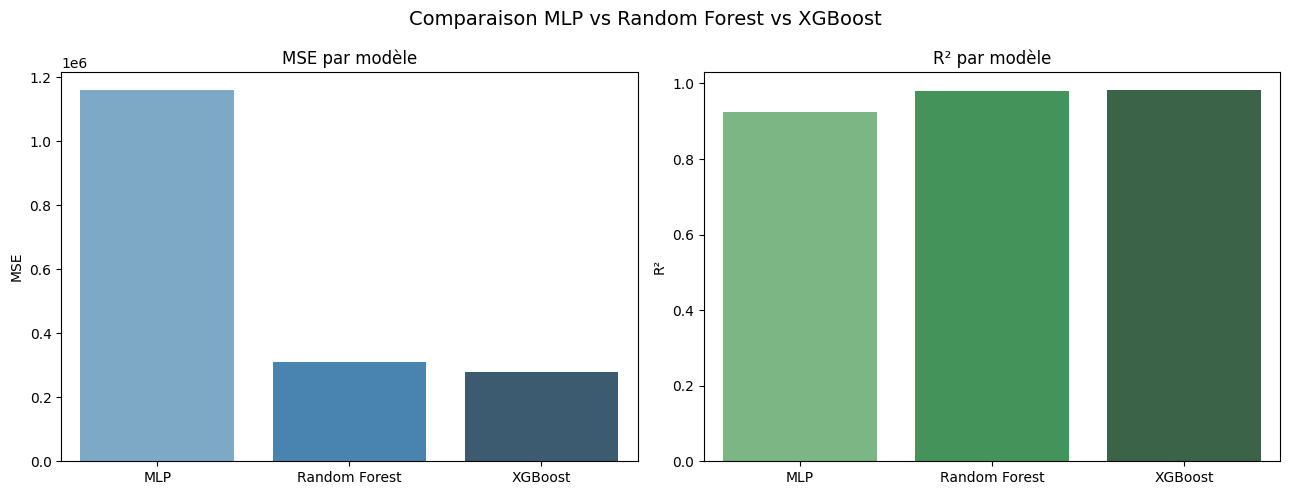

In [21]:
# 6. Graphe comparatif ---------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
model_names = list(results)
mse_vals = [results[m][0] for m in model_names]
r2_vals = [results[m][1] for m in model_names]

sns.barplot(x=model_names, y=mse_vals, ax=axes[0], palette="Blues_d")
axes[0].set_title("MSE par modèle"); axes[0].set_ylabel("MSE")

sns.barplot(x=model_names, y=r2_vals, ax=axes[1], palette="Greens_d")
axes[1].set_title("R² par modèle"); axes[1].set_ylabel("R²")

plt.suptitle("Comparaison MLP vs Random Forest vs XGBoost", fontsize=14)
plt.tight_layout(); plt.show()

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


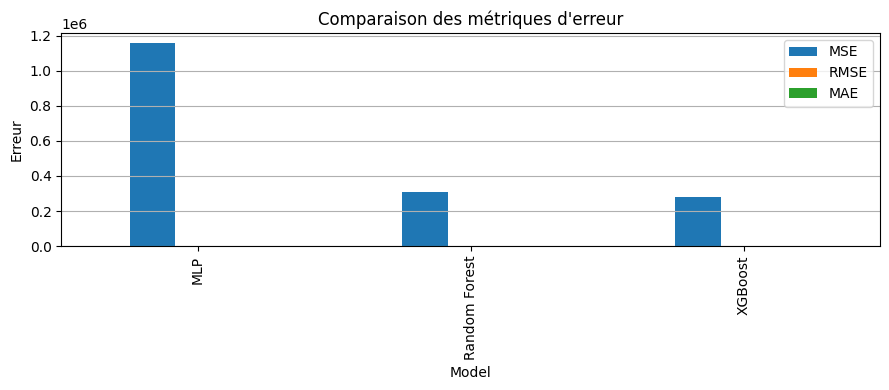

In [22]:
from sklearn.metrics import mean_absolute_error
extra = {"Model": [], "MSE": [], "RMSE": [], "MAE": []}

for name, model in models:
    y_pred = model.predict(X_test).flatten()
    mse_val  = mean_squared_error(y_test, y_pred)
    rmse_val = np.sqrt(mse_val)                 # √MSE  →  RMSE
    mae_val  = mean_absolute_error(y_test, y_pred)

    extra["Model"].append(name)
    extra["MSE"].append(mse_val)
    extra["RMSE"].append(rmse_val)
    extra["MAE"].append(mae_val)


extra_df = pd.DataFrame(extra).set_index("Model")
extra_df.plot(kind="bar", figsize=(9,4), title="Comparaison des métriques d'erreur")
plt.ylabel("Erreur"); plt.grid(axis="y"); plt.tight_layout(); plt.show()

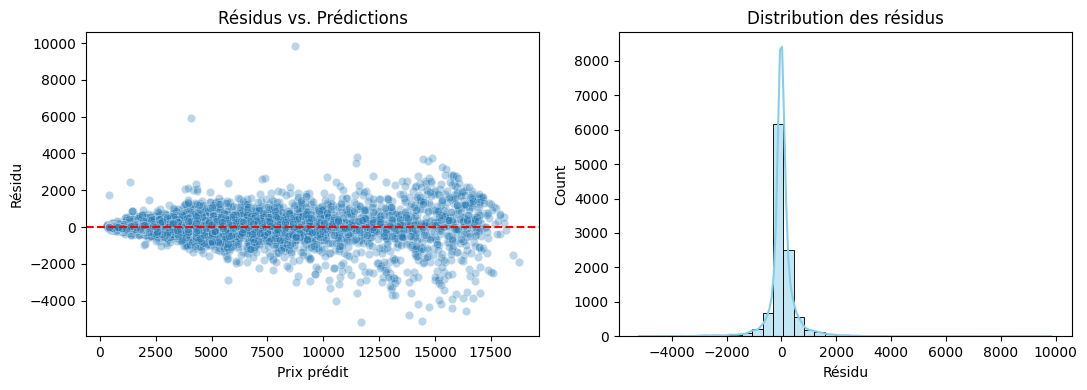

In [23]:
# ── B. RESIDUAL DIAGNOSTICS (EX: XGBoost) ─────────────────────────────────────
resid = y_test - xgb.predict(X_test)
fig, ax = plt.subplots(1,2, figsize=(11,4))

sns.scatterplot(x=xgb.predict(X_test), y=resid, ax=ax[0], alpha=.3)
ax[0].axhline(0, ls="--", c="red"); ax[0].set_title("Résidus vs. Prédictions")
ax[0].set_xlabel("Prix prédit"); ax[0].set_ylabel("Résidu")

sns.histplot(resid, kde=True, ax=ax[1], bins=40, color="skyblue")
ax[1].set_title("Distribution des résidus"); ax[1].set_xlabel("Résidu")

plt.tight_layout(); plt.show()

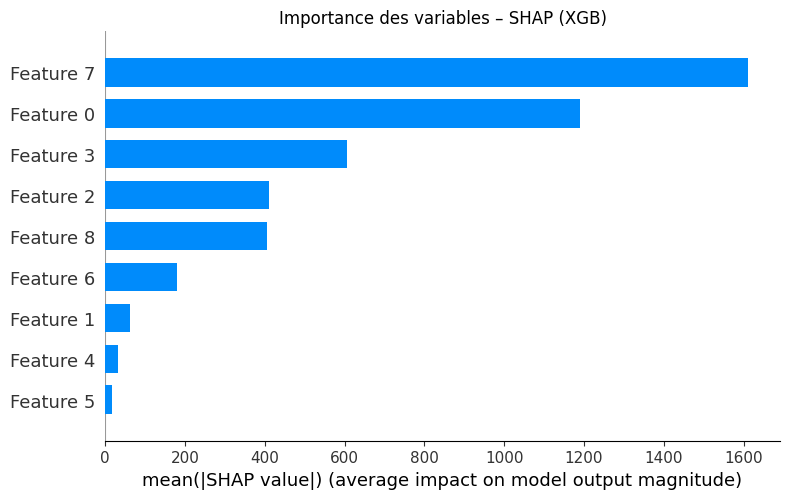

In [24]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Résumé barre (importance globale)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Importance des variables – SHAP (XGB)");
 plt.tight_layout();
 plt.show()